In [5]:
# Shor's Algorithm for Error Correction using Qiskit

# Import necessary libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Define a function to implement Shor's error correction code
def shors_error_correction():
    # Create a quantum circuit with 9 qubits and 9 classical bits
    qc = QuantumCircuit(9, 9)

    # Shor code (left side)
    qc.cx(0,3)
    qc.cx(0,6)

    qc.h(0)
    qc.h(3)
    qc.h(6)

    qc.cx(0,1)
    qc.cx(3,4)
    qc.cx(6,7)

    qc.cx(0,2)
    qc.cx(3,5)
    qc.cx(6,8)

    # error block
    qc.barrier()
    #bit flip error
    qc.x(0)
    qc.barrier()
    # end error block

    # Shor code (right side)
    qc.cx(0,1)
    qc.cx(3,4)
    qc.cx(6,7)

    qc.cx(0,2)
    qc.cx(3,5)
    qc.cx(6,8)

    qc.ccx(1,2,0)
    qc.ccx(4,5,3)
    qc.ccx(8,7,6)

    qc.h(0)
    qc.h(3)
    qc.h(6)

    qc.cx(0,3)
    qc.cx(0,6)
    qc.ccx(6,3,0)
    # Measure all qubits
    qc.measure(range(9), range(9))

    return qc

# Generate the circuit
qc = shors_error_correction()

# Visualize the circuit
print(qc.draw())

# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

# Get and plot results
counts = result_sim.get_counts(qc_compiled)
print(counts)

               ┌───┐           ░ ┌───┐ ░           ┌───┐┌───┐              »
q_0: ──■────■──┤ H ├──■────■───░─┤ X ├─░───■────■──┤ X ├┤ H ├────────■─────»
       │    │  └───┘┌─┴─┐  │   ░ └───┘ ░ ┌─┴─┐  │  └─┬─┘└───┘┌─┐     │     »
q_1: ──┼────┼───────┤ X ├──┼───░───────░─┤ X ├──┼────■───────┤M├─────┼─────»
       │    │       └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │       └╥┘┌─┐  │     »
q_2: ──┼────┼────────────┤ X ├─░───────░──────┤ X ├──■────────╫─┤M├──┼─────»
     ┌─┴─┐  │  ┌───┐     └───┘ ░       ░      └───┘┌───┐┌───┐ ║ └╥┘┌─┴─┐   »
q_3: ┤ X ├──┼──┤ H ├──■────■───░───────░───■────■──┤ X ├┤ H ├─╫──╫─┤ X ├───»
     └───┘  │  └───┘┌─┴─┐  │   ░       ░ ┌─┴─┐  │  └─┬─┘└───┘ ║  ║ └┬─┬┘   »
q_4: ───────┼───────┤ X ├──┼───░───────░─┤ X ├──┼────■────────╫──╫──┤M├────»
            │       └───┘┌─┴─┐ ░       ░ └───┘┌─┴─┐  │        ║  ║  └╥┘ ┌─┐»
q_5: ───────┼────────────┤ X ├─░───────░──────┤ X ├──■────────╫──╫───╫──┤M├»
          ┌─┴─┐┌───┐     └───┘ ░       ░      └───┘┌───┐┌───┐ ║  ║   ║  └╥┘»

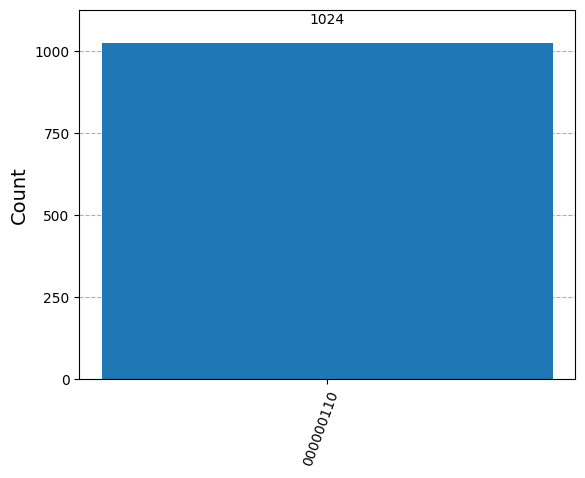

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

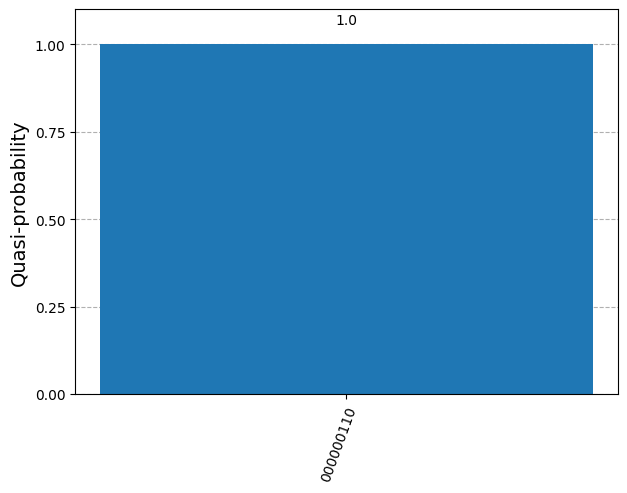

In [8]:
from qiskit.visualization import plot_distribution
plot_distribution(counts)